In [1]:
import json
with open('./Data/monitor/att_lr5e-4.json','r') as f:
    data=json.load(f)

In [2]:
data.keys()

dict_keys(['Name', 'rsmi', 'Attention reactant', 'Attention product'])

In [3]:
len(data['rsmi'])*len(data['rsmi'][0][0])

40000

In [5]:
len(data['Attention reactant'])

40000

In [ ]:
import torch
import itertools

def find_original_indices(row_idx, original_reactants_num):
    """
    Given the index of a row in new_tensor, identify the indices i and j 
    that correspond to the original rows summed to create that row.
    
    Parameters:
        row_idx (int): Index in the new_tensor.
        original_tensor (torch.Tensor): The original tensor.
        
    Returns:
        tuple: A tuple (i, j) of the indices, or (row_idx, ) if it corresponds to an original row.
    """
    # Number of original rows
    num_original_rows = original_reactants_num

    # If the row index corresponds to an original row, return it directly
    if row_idx < num_original_rows:
        return (row_idx, )  # Single index for original row

    # Calculate the indices i, j for the summed rows
    # Offset row_idx by the number of original rows to get the pair index
    pair_index = row_idx - num_original_rows
    
    # Generate all unique pairs of indices (i, j) using itertools.combinations
    pairs = list(itertools.combinations(range(num_original_rows), 2))
    
    # Return the pair at the calculated index
    return pairs[pair_index]


Original reaction:


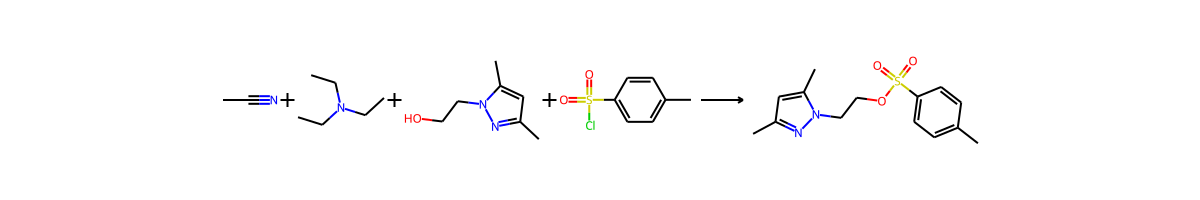

modified reaction:


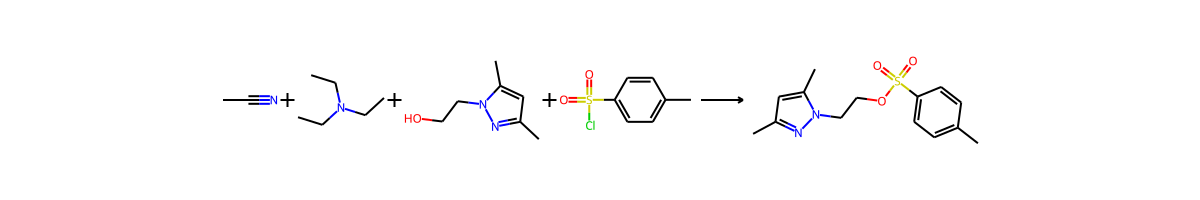

attention_r is:  [9.143829356877964e-13, 6.840996410843736e-13, 0.34182417392730713, 0.0009944566991180182, 1.8698731799049462e-11, 0.013576915487647057, 0.00035245908657088876, 0.0002044044085778296, 1.3854238204658031e-05, 0.6430337429046631]
attention max is:  0.6430337429046631
The 3 attentioned reactant:


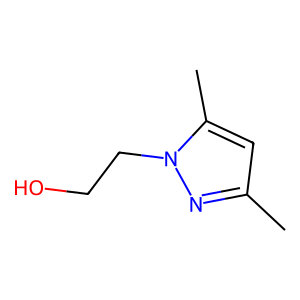

The 4 attentioned reactant:


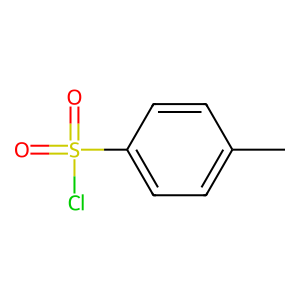

attention_product:  [1.0]
The 1  product:


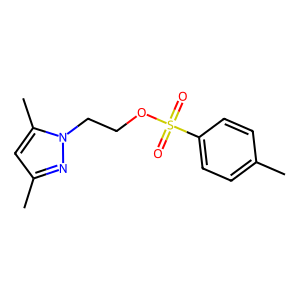

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import numpy as np

idx=int(input('Input idx reaction'))
constrained_number=2
#Original reaction
rsmi=data['rsmi'][0][0][idx]
reaction= AllChem.ReactionFromSmarts(rsmi,useSmiles=True)
print('Original reaction:')
display(Draw.ReactionToImage(reaction))
reactant=rsmi.split('>>')[0].split('.')
original_num_reactant=len(reactant)
product=rsmi.split('>>')[1]

#Modified reaction (ignore mol having num_atoms less than constrained_num above)
modified_reactant=[i for i in reactant if Chem.MolFromSmiles(i).GetNumAtoms()>constrained_number]
modified_reactant='.'.join(modified_reactant)
modified_reaction='>>'.join([modified_reactant,product])
modified_reaction=AllChem.ReactionFromSmarts(modified_reaction,useSmiles=True)
print('modified reaction:')
display(Draw.ReactionToImage(modified_reaction))

#Attention_Reactant
attention_r=data['Attention reactant'][idx]
arg_max=np.argmax(np.array(attention_r))
print('attention_r is: ',attention_r)
print('attention max is: ',np.max(np.array(attention_r)))


result = find_original_indices(arg_max, original_num_reactant)
for j in result:
    reactant_attention=reactant[j]
    reactant_attention_mol=Chem.MolFromSmiles(reactant_attention)
    print(f'The {j+1} attentioned reactant:')
    display(Draw.MolToImage(reactant_attention_mol))

# Attention 
attention_p=data['Attention product'][idx]
print('attention_product: ',attention_p)
for idx_m,m in enumerate(product.split('.')):
    product_attention_mol=Chem.MolFromSmiles(m)
    print(f'The {idx_m+1}  product:')
    display(Draw.MolToImage(product_attention_mol))
